**Logistic Regression**

In [5]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [6]:
#reading dataset
diabetes_data = pd.read_excel("/content/diabetes2 (1).xlsx")

Understanding data

In [7]:
#visualising dataframe
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# getting information of data
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#checking shape of data
diabetes_data.shape

(768, 9)

In [10]:
#checking for columns of dataframe
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
#checking for any nan values in dataframe
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# changing column name glucose to fasting glucose
diabetes_data.rename(columns={"Glucose":"FastingGlucose"},inplace=True)

Box Plot

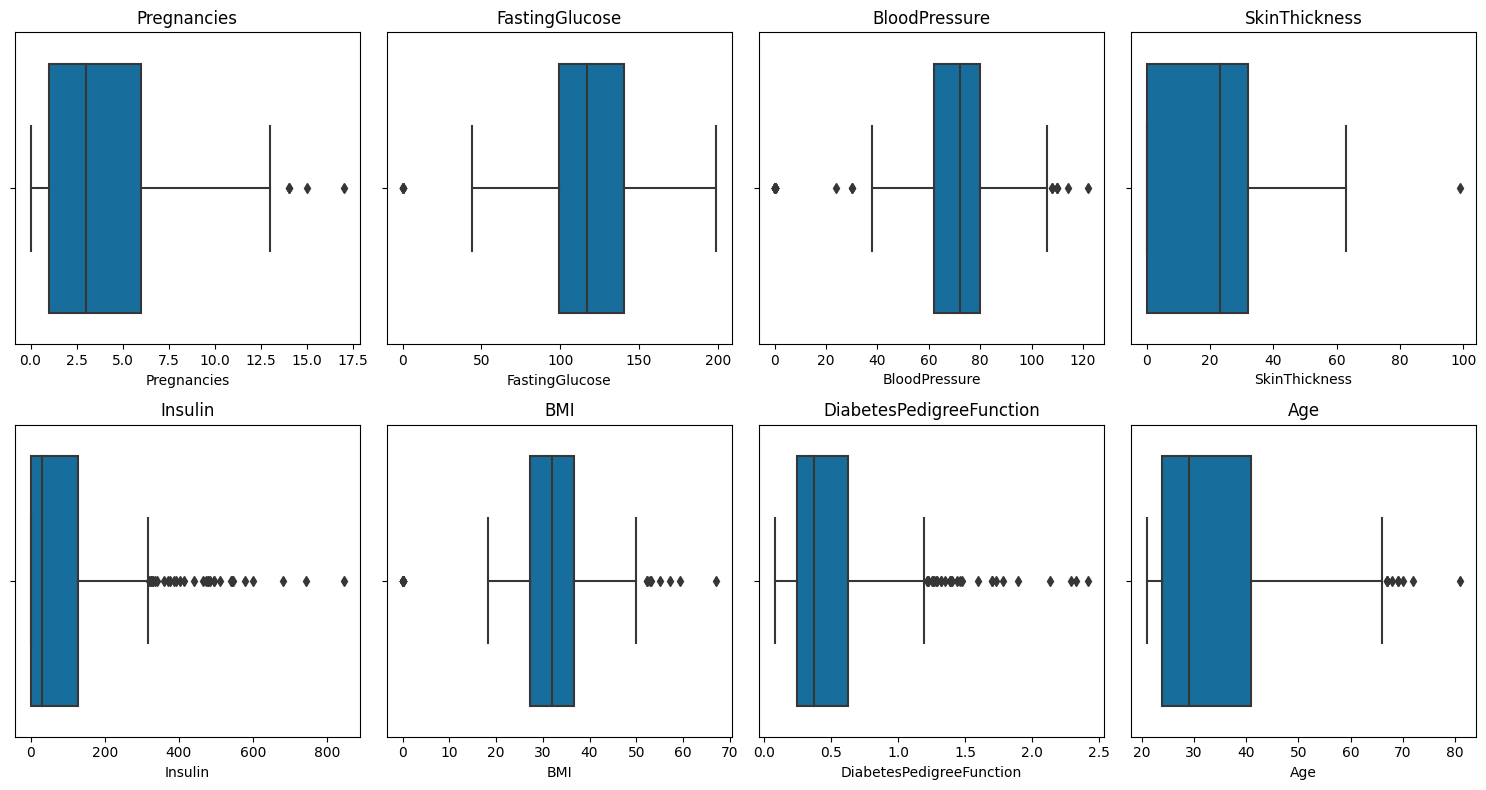

In [13]:
# Assigning column to be plotted
columns_to_plot = ['Pregnancies', 'FastingGlucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.flatten()

# Iterate through columns and create box plots
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=column, data=diabetes_data,ax=axes[i], palette='colorblind')
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Correlation Analysis

In [14]:
#The measure of the relationship between them
diabetes_data.corr()

,Pregnancies,FastingGlucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
FastingGlucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

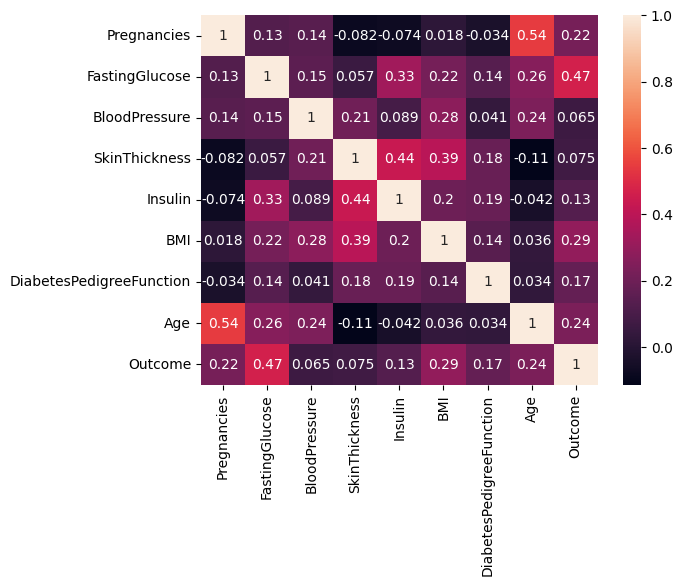

In [15]:
#show each feature among itself.
sns.heatmap(diabetes_data.corr(),annot=True)


Checking Importance of each feature

In [16]:
# different columns of dataframe for checking importance
x=diabetes_data[['FastingGlucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness','Insulin', 'DiabetesPedigreeFunction']]
# Selecting the values in the outcome column
y = diabetes_data.iloc[:, 8]
#using extratree classifier for checking importance of each feature
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
#fiiting columns data and outcome data to model
model.fit(x,y)
#printing model features
print(model.feature_importances_)




[0.25735909 0.1624003  0.15908082 0.1159896  0.08970464 0.07969017
 0.13577538]


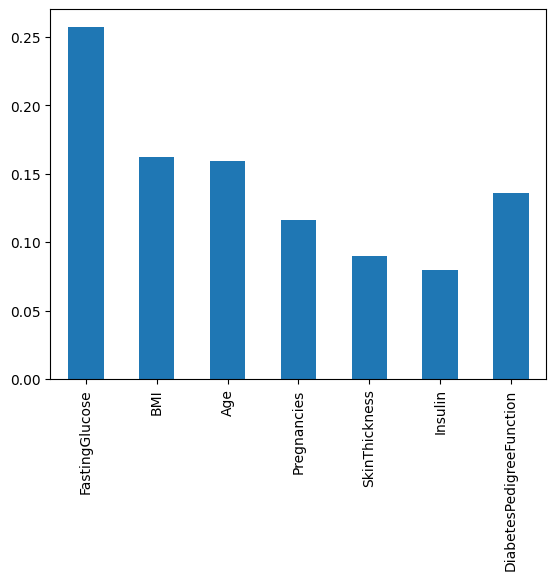

In [17]:
#plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.plot(kind='bar')
plt.show()


Logistic Regression

In [18]:
#importing libraries needed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [19]:
# assigning different features to x variable
x=diabetes_data[['FastingGlucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness','Insulin', 'DiabetesPedigreeFunction']]
# assigning target column to y variable
y = diabetes_data.iloc[:, 8]


In [20]:
#Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [21]:
x_scaled

array([[ 0.84832379,  0.20401277,  1.4259954 , ...,  0.90726993,
        -0.69289057,  0.46849198],
       [-1.12339636, -0.68442195, -0.19067191, ...,  0.53090156,
        -0.69289057, -0.36506078],
       [ 1.94372388, -1.10325546, -0.10558415, ..., -1.28821221,
        -0.69289057,  0.60439732],
       ...,
       [ 0.00330087, -0.73518964, -0.27575966, ...,  0.15453319,
         0.27959377, -0.68519336],
       [ 0.1597866 , -0.24020459,  1.17073215, ..., -1.28821221,
        -0.69289057, -0.37110101],
       [-0.8730192 , -0.20212881, -0.87137393, ...,  0.65635768,
        -0.69289057, -0.47378505]])

In [22]:
#splitting train and test data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=0)


In [23]:
#log regression
log_reg = LogisticRegression(random_state=0)

In [24]:
#fitting the training data to model
log_reg.fit(x_train,y_train)


LogisticRegression(random_state=0)

In [25]:
#checking test data
y_pred = log_reg.predict(x_test)


In [26]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [27]:
#checking accuracy of logistic regression
print("Accuracy: ",log_reg.score(x_test,y_test))

Accuracy:  0.8116883116883117


Implementing gradient descent

In [28]:
import numpy as np

# defining sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to train the logistic regression model
def train_logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    '''
    X = features

    Y = True labels
    '''
    # Initialize weights and bias
    num_features = X.shape[1]
    weights = np.zeros(num_features)
    bias = 0

    # Training loop
    for _ in range(epochs):
        # linear data on input data X
        z = np.dot(X, weights) + bias
         # Convert to actual probability using sigmoid function
        probabilities = sigmoid(z)

        # Calculate errors
        errors = y - probabilities

        # Update weights and bias
        weights += learning_rate * np.dot(errors, X) / len(y)
        bias += learning_rate * np.sum(errors) / len(y)

    # Return the trained model parameters
    return weights, bias


# Function to make predictions
def predict(X, weights, bias):
    z = np.dot(X, weights.T) + bias
    probabilities = sigmoid(z)
    return probabilities





In [29]:
#running logistic regression on training dataset
w,b = train_logistic_regression(x_train,y_train,0.001,10000)

In [30]:
#predicting y_test values using x_test,weights and intercept
y_pred = predict(x_test,w,b)

In [31]:
# checking y predicted
y_pred

array([0.90143701, 0.2295956 , 0.14096262, 0.64514945, 0.18179842,
       0.08226018, 0.71742658, 0.8311841 , 0.44043945, 0.44845626,
       0.59185568, 0.9278475 , 0.37919954, 0.23340415, 0.19914216,
       0.21993153, 0.79868304, 0.05124293, 0.50206413, 0.27525802,
       0.62615469, 0.4357654 , 0.15702218, 0.13624959, 0.10453949,
       0.33550868, 0.10105934, 0.87511822, 0.15892233, 0.20126439,
       0.52119005, 0.27195583, 0.18689136, 0.42932573, 0.13883796,
       0.63350114, 0.5162395 , 0.1675698 , 0.29179709, 0.64561259,
       0.31540007, 0.27488796, 0.2129596 , 0.72019874, 0.762789  ,
       0.03103936, 0.12738993, 0.25243539, 0.37418019, 0.35663029,
       0.41723072, 0.20798932, 0.82781279, 0.52456057, 0.20853086,
       0.0098598 , 0.10873283, 0.57069253, 0.31138087, 0.0742721 ,
       0.75658156, 0.51589566, 0.15711354, 0.48289764, 0.62452973,
       0.84897621, 0.70558904, 0.22492734, 0.35853682, 0.18540939,
       0.16612731, 0.27049362, 0.14421205, 0.92207645, 0.75883

In [32]:
# Checking values pf y_pred greater than 0.5
y_pred > 0.5

array([ True, False, False,  True, False, False,  True,  True, False,
       False,  True,  True, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
        True, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False,  True, False,  True,  True, False,
        True, False,  True, False,  True, False,  True, False, False,
       False, False,

In [33]:
# Convert the boolean results to integers (0 or 1)
predicted_binary = (y_pred > 0.5).astype(int)

# Check if the predicted binary values match the true labels (y_test)
correct_predictions = predicted_binary == y_test

# Calculate the mean accuracy by taking the average of correct predictions
accuracy = correct_predictions.mean()


In [34]:
#Checking accuracy
accuracy

0.7792207792207793